In [106]:
# Primeiro passo, importar a bibliotecas pandas e carregar o arquivo.

In [107]:
import pandas as pd
        
from matplotlib import pyplot as plt 
import numpy as np 
  
# Data ..... git clone https://github.com/defcom17/NSL_KDD
Data_IDS = pd.read_csv("KDDTrain.csv", header=None)

In [108]:
# essa base de dados tem diversos ataques que aconteceram.

In [109]:
print(Data_IDS)

        0    1         2   3     4     5   6   7   8   9   ...    33    34  \
0        0  tcp  ftp_data  SF   491     0   0   0   0   0  ...  0.17  0.03   
1        0  udp     other  SF   146     0   0   0   0   0  ...  0.00  0.60   
2        0  tcp   private  S0     0     0   0   0   0   0  ...  0.10  0.05   
3        0  tcp      http  SF   232  8153   0   0   0   0  ...  1.00  0.00   
4        0  tcp      http  SF   199   420   0   0   0   0  ...  1.00  0.00   
...     ..  ...       ...  ..   ...   ...  ..  ..  ..  ..  ...   ...   ...   
125968   0  tcp   private  S0     0     0   0   0   0   0  ...  0.10  0.06   
125969   8  udp   private  SF   105   145   0   0   0   0  ...  0.96  0.01   
125970   0  tcp      smtp  SF  2231   384   0   0   0   0  ...  0.12  0.06   
125971   0  tcp    klogin  S0     0     0   0   0   0   0  ...  0.03  0.05   
125972   0  tcp  ftp_data  SF   151     0   0   0   0   0  ...  0.30  0.03   

          35    36    37    38    39    40       41  42  
0    

In [110]:
# elas não tem rótulos.
Data_IDS.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

In [111]:
# Atribuíndo rótulos às colunas pra facilitar. Eu indico pra vocês o que é cada coluna. 


Columns = ["duration","protocol_type","service","flag","src_bytes",
"dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
"logged_in","num_compromised","root_shell","su_attempted","num_root",
"num_file_creations","num_shells","num_access_files","num_outbound_cmds",
"is_host_login","is_guest_login","count","srv_count","serror_rate",
"srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
"diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [112]:
#agora temos rótulos nas colunas.
Data_IDS = pd.read_csv("KDDTrain.csv", header=None, names = Columns)
Data_IDS.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty'],
      dtype='object')

In [113]:
print(Data_IDS)

        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0      

In [114]:
#resumo estatistico por coluna dos dados 
Data_IDS.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [115]:
Data_IDS.label # coluna dos ataques 

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: label, Length: 125973, dtype: object

In [116]:
#importando a biblioteca de preprocessamento dos dados
from sklearn import preprocessing

In [117]:

Data_IDS.protocol_type

0         tcp
1         udp
2         tcp
3         tcp
4         tcp
         ... 
125968    tcp
125969    udp
125970    tcp
125971    tcp
125972    tcp
Name: protocol_type, Length: 125973, dtype: object

In [118]:
# tipo de protocolo, servico, flag, label
# preprocessing.LabelEncoder() vai transformar str em valor numerico 
Data_IDS.protocol_type = preprocessing.LabelEncoder().fit_transform(Data_IDS["protocol_type"]) 
Data_IDS.service = preprocessing.LabelEncoder().fit_transform(Data_IDS["service"]) 
Data_IDS.flag = preprocessing.LabelEncoder().fit_transform(Data_IDS["flag"]) 
Data_IDS.label = preprocessing.LabelEncoder().fit_transform(Data_IDS["label"])

In [119]:
# depois do preprocessamento
Data_IDS.protocol_type

0         1
1         2
2         1
3         1
4         1
         ..
125968    1
125969    2
125970    1
125971    1
125972    1
Name: protocol_type, Length: 125973, dtype: int32

In [120]:
Data_IDS["label"]

0         11
1         11
2          9
3         11
4         11
          ..
125968     9
125969    11
125970    11
125971     9
125972    11
Name: label, Length: 125973, dtype: int32

In [121]:
ataque = []
normal = []
for i in Data_IDS['label']:
    if i != 11:
        ataque.append(i)
        
    else:
        normal.append(i)

In [122]:
ataque1= len(ataque)
normal1 = len(normal)
print(f'Quantidade de Fluxos de ataques: {ataque1}\nQuantidade de Fluxos normais: {normal1}')

Quantidade de Fluxos de ataques: 58630
Quantidade de Fluxos normais: 67343


In [123]:

# x = todas as colunas y = a conluna onde tem os ataques
X = Data_IDS[Columns].values
y = Data_IDS.label.values
print(y)
print(X)

[11 11  9 ... 11  9 11]
[[ 0.  1. 20. ...  0. 11. 20.]
 [ 0.  2. 44. ...  0. 11. 15.]
 [ 0.  1. 49. ...  0.  9. 19.]
 ...
 [ 0.  1. 54. ...  0. 11. 18.]
 [ 0.  1. 30. ...  0.  9. 20.]
 [ 0.  1. 20. ...  0. 11. 21.]]


In [124]:
# Yellowbrick é uma biblioteca de visualização associada ao scikit-learn.


from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

C:\Users\pedro\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\pedro\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


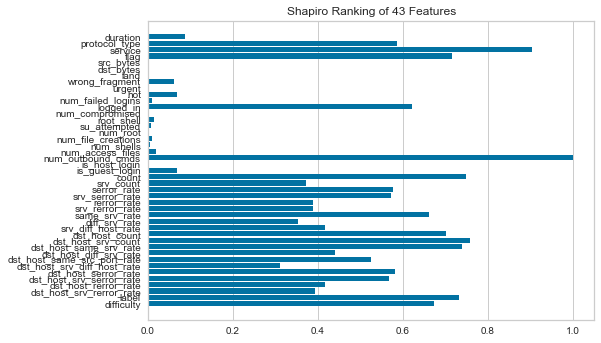

<AxesSubplot:title={'center':'Shapiro Ranking of 43 Features'}>

In [125]:

# O parâmetro Shapiro se refere ao algoritmo de ranqueamento chamado de Shapiro-Wilk 
# ranqueamento em 1 dimensao por importancia caracteristicas 

visualizer = Rank1D(features=Columns, algorithm='Shapiro')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [126]:
# Rank2D vai analisar a corelacao entre 2 caracteristicas e vai ranquear a importancia
# entre esses pares de caracteristicas 
visualizer = Rank2D(features=Columns, algorithm='covariance')

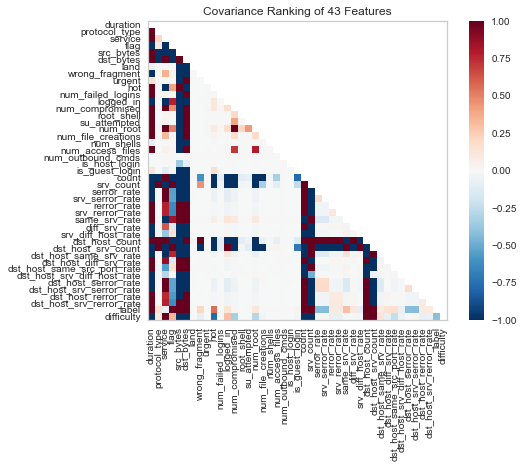

<AxesSubplot:title={'center':'Covariance Ranking of 43 Features'}>

In [127]:
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [128]:
# Yellowbrick dados de alta dimensionalidade.
# como tem uma base de dados autamente dimenssional (muitos valores e caracteristicas)
# temos que usar algoritimo de decomposicao  
from sklearn.decomposition import PCA
from yellowbrick.features.pca import PCADecomposition

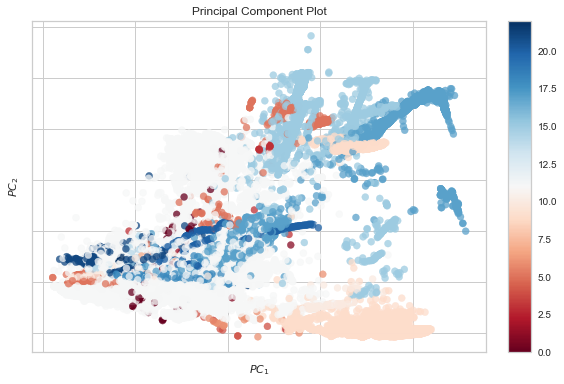

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [129]:
# Plotando as dimensões (PCA2 vs PCA1)

visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

In [130]:
# para detectar se o fluxo e de um ataque 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # separar o modelo

In [131]:
# separando a base de dados uma parte para teste outra para treino (30% da base para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)

In [142]:
# treinando o modelo de ML para detectar intrusões

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
Score = clf.score(X_test,y_test)
valores = (Score*100)
print(f"{valores} %")


86.01291278577476 %


In [143]:
valor_f = "{:.2f}".format(valores)
g = 100-valores
g_f = "{:.2f}".format(g)
y = (1-Score)
n = (ataque1*y)
n_f = "{:.0f}".format(n)
at = ataque1*Score
at_f = "{:.0f}".format(at)


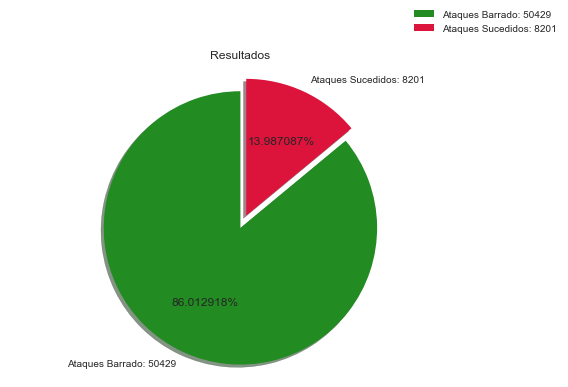

In [136]:
data_g = [valores, g]
candi = [f'Ataques Barrado: {at_f}', f'Ataques Sucedidos: {n_f}']
cores=['forestgreen', 'crimson']
explode = (0.1, 0)  
plt.title('Resultados')
plt.pie(data_g, explode=explode, labels=candi, colors=cores, autopct='%2f%%', shadow=True, startangle=90)
plt.legend(candi, bbox_to_anchor=(1.2, 1.2),loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show()